In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dataset/finaldata.csv')
#dataset is read using pandas framework

In [ ]:
data.shape

(4232, 51)

In [ ]:
data.describe()

,Unnamed: 0,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Votes,Candidate_Type,Valid_Votes,...,ENOP,Party_Type_TCPD,Party_ID,Contested,Last_Party_ID,No_Terms,Age,PC_Name,PC_No,CandID
count,4232.000000,4232.0,4232.000000,4232.0,4232.0,4232.0,4232.0,4232.000000,0.0,4232.000000,...,4232.000000,0.0,4232.000000,3998.000000,621.000000,3998.000000,3998.000000,0.0,0.0,0.0
mean,2115.500000,12.0,115.253544,2021.0,5.0,0.0,4.0,10925.447070,NaN,198100.531664,...,2.647006,NaN,12077.592628,1.176088,6848.785829,0.136818,44.507254,NaN,NaN,NaN
std,1221.817499,0.0,68.316849,0.0,0.0,0.0,0.0,27152.954736,NaN,34856.208935,...,0.331779,NaN,6698.445373,0.712312,3821.480004,0.591018,11.235324,NaN,NaN,NaN
min,0.000000,12.0,1.000000,2021.0,5.0,0.0,4.0,2.000000,NaN,101650.000000,...,1.820000,NaN,268.000000,1.000000,706.000000,0.000000,4.000000,NaN,NaN,NaN
25%,1057.750000,12.0,56.000000,2021.0,5.0,0.0,4.0,121.000000,NaN,177681.000000,...,2.380000,NaN,10192.000000,1.000000,5792.000000,0.000000,36.000000,NaN,NaN,NaN
50%,2115.500000,12.0,116.000000,2021.0,5.0,0.0,4.0,336.500000,NaN,197165.000000,...,2.560000,NaN,10809.000000,1.000000,5897.000000,0.000000,43.000000,NaN,NaN,NaN
75%,3173.250000,12.0,177.000000,2021.0,5.0,0.0,4.0,1966.500000,NaN,214108.000000,...,2.860000,NaN,10809.000000,1.000000,10192.000000,0.000000,52.000000,NaN,NaN,NaN
max,4231.000000,12.0,234.000000,2021.0,5.0,0.0,4.0,171558.000000,NaN,388355.000000,...,4.000000,NaN,24557.000000,12.000000,18691.000000,10.000000,83.000000,NaN,NaN,NaN


In [ ]:
data


,Unnamed: 0,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,...,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc
0,0,AE,Tamil_Nadu,12,1,2021,5,0,4,True,...,60.0,TIRUVALLUR,NaN,NaN,NaN,10th Pass,Business,NaN,NaN,NaN
1,1,AE,Tamil_Nadu,12,1,2021,5,0,4,False,...,50.0,TIRUVALLUR,NaN,NaN,NaN,10th Pass,Salaried Work or Employed,Qualified Professional,NaN,NaN
2,2,AE,Tamil_Nadu,12,1,2021,5,0,4,False,...,31.0,TIRUVALLUR,NaN,NaN,NaN,8th Pass,Agriculture,NaN,NaN,NaN
3,3,AE,Tamil_Nadu,12,1,2021,5,0,4,False,...,45.0,TIRUVALLUR,NaN,NaN,NaN,8th Pass,Other,NaN,NaN,NaN
4,4,AE,Tamil_Nadu,12,1,2021,5,0,4,False,...,NaN,TIRUVALLUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4227,4227,AE,Tamil_Nadu,12,234,2021,5,0,4,False,...,42.0,KANNIYAKUMARI,NaN,NaN,NaN,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN
4228,4228,AE,Tamil_Nadu,12,234,2021,5,0,4,False,...,61.0,KANNIYAKUMARI,NaN,NaN,NaN,Graduate,Business,Contractor,NaN,NaN
4229,4229,AE,Tamil_Nadu,12,234,2021,5,0,4,False,...,45.0,KANNIYAKUMARI,NaN,NaN,NaN,NaN,Small Business or Self-employed,NaN,NaN,NaN
4230,4230,AE,Tamil_Nadu,12,234,2021,5,0,4,False,...,34.0,KANNIYAKUMARI,NaN,NaN,NaN,12th Pass,Business,NaN,NaN,NaN


In [ ]:
data.isnull().sum()

Unnamed: 0                   0
Election_Type                0
State_Name                   0
Assembly_No                  0
Constituency_No              0
Year                         0
month                        0
Poll_No                      0
DelimID                      0
Position                     0
Candidate                    0
Sex                        234
Party                        0
Votes                        0
Candidate_Type            4232
Valid_Votes                  0
Electors                     0
Constituency_Name            0
Constituency_Type            0
Sub_Region                   0
N_Cand                       0
Turnout_Percentage           0
Vote_Share_Percentage        0
Deposit_Lost                 0
Margin                       0
Margin_Percentage            0
ENOP                         0
pid                        234
Party_Type_TCPD           4232
Party_ID                     0
last_poll                    0
Contested                  234
Last_Par

In [ ]:
data["leading_digit_votes"]=data["Votes"].apply(lambda X:str(X)[0])

In [ ]:
data['leading_digit_votes']=data['leading_digit_votes'].astype(int)

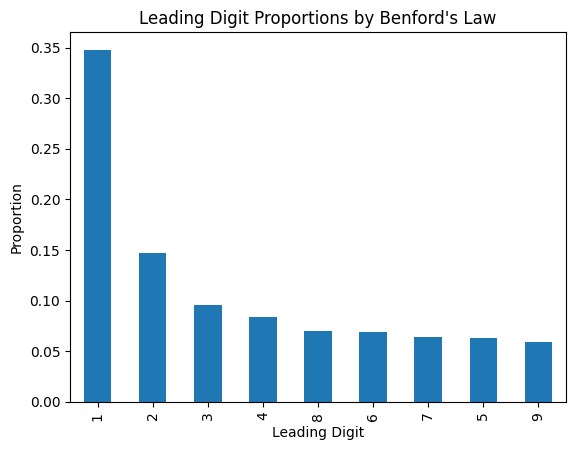

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value counts of leading digits
leading_digit_counts = data["leading_digit_votes"].value_counts()

# Calculate the proportion of each leading digit and plot the bar chart
(leading_digit_counts / leading_digit_counts.sum()).plot(kind='bar')

plt.xlabel("Leading Digit")
plt.ylabel("Proportion")
plt.title("Leading Digit Proportions by Benford's Law")
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232 entries, 0 to 4231
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4232 non-null   int64  
 1   Election_Type           4232 non-null   object 
 2   State_Name              4232 non-null   object 
 3   Assembly_No             4232 non-null   int64  
 4   Constituency_No         4232 non-null   int64  
 5   Year                    4232 non-null   int64  
 6   month                   4232 non-null   int64  
 7   Poll_No                 4232 non-null   int64  
 8   DelimID                 4232 non-null   int64  
 9   Position                4232 non-null   bool   
 10  Candidate               4232 non-null   object 
 11  Sex                     3998 non-null   object 
 12  Party                   4232 non-null   object 
 13  Votes                   4232 non-null   int64  
 14  Candidate_Type          0 non-null      

In [ ]:
data.shape

(4232, 52)

In [ ]:

data=data.set_index("Candidate")

In [ ]:
data=data.drop(['None Of The Above']).reset_index()

In [ ]:
X = data.drop(['Unnamed: 0','Election_Type','State_Name','Assembly_No','Constituency_No','Year','month','Poll_No','DelimID','Position','ENOP','pid','Party_Type_TCPD','Party_ID','N_Cand','PC_No','PC_Name','CandID','Candidate_Type','Margin','Margin_Percentage','Turnout_Percentage','Vote_Share_Percentage','Candidate','Last_Party_ID','Last_Party','Last_Constituency_Name','Same_Constituency','Same_Party', 'TCPD_Prof_Main_Desc','Deposit_Lost', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc','last_poll'],axis=1)


In [ ]:
X.shape

(3998, 18)

In [ ]:
X

,Sex,Party,Votes,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,Contested,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,MyNeta_education,TCPD_Prof_Main,leading_digit_votes
0,M,DMK,126452,222069,284412,GUMMIDIPUNDI,GEN,CHENNAI CITY REGION,1.0,1.0,False,False,False,60.0,TIRUVALLUR,10th Pass,Business,1
1,M,PMK,75514,222069,284412,GUMMIDIPUNDI,GEN,CHENNAI CITY REGION,1.0,0.0,False,False,False,50.0,TIRUVALLUR,10th Pass,Salaried Work or Employed,7
2,F,NTK,11701,222069,284412,GUMMIDIPUNDI,GEN,CHENNAI CITY REGION,1.0,0.0,False,False,False,31.0,TIRUVALLUR,8th Pass,Agriculture,1
3,M,DMDK,2576,222069,284412,GUMMIDIPUNDI,GEN,CHENNAI CITY REGION,1.0,0.0,False,False,False,45.0,TIRUVALLUR,8th Pass,Other,2
4,M,BSP,1038,222069,284412,GUMMIDIPUNDI,GEN,CHENNAI CITY REGION,1.0,0.0,False,False,False,28.0,TIRUVALLUR,Graduate Professional,Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,M,IND,235,169918,257959,KILLIYOOR,GEN,SOUTHERN REGION,1.0,0.0,False,False,False,42.0,KANNIYAKUMARI,Graduate Professional,Liberal Profession or Professional,2
3994,M,IND,213,169918,257959,KILLIYOOR,GEN,SOUTHERN REGION,1.0,0.0,False,False,False,61.0,KANNIYAKUMARI,Graduate,Business,2
3995,M,IND,213,169918,257959,KILLIYOOR,GEN,SOUTHERN REGION,1.0,0.0,False,False,False,45.0,KANNIYAKUMARI,NaN,Small Business or Self-employed,2
3996,M,National Democratic Party of South India,186,169918,257959,KILLIYOOR,GEN,SOUTHERN REGION,1.0,0.0,False,False,False,34.0,KANNIYAKUMARI,12th Pass,Business,1


In [ ]:
X.columns

Index(['Sex', 'Party', 'Votes', 'Valid_Votes', 'Electors', 'Constituency_Name',
       'Constituency_Type', 'Sub_Region', 'Contested', 'No_Terms', 'Turncoat',
       'Incumbent', 'Recontest', 'Age', 'District_Name', 'MyNeta_education',
       'TCPD_Prof_Main', 'leading_digit_votes'],
      dtype='object')

Trying to check Benford's Law

In [ ]:
X["leading_digit_votes"]=X["Votes"].apply(lambda X:str(X)[0])

In [ ]:
X['leading_digit_votes']=X['leading_digit_votes'].astype(int)

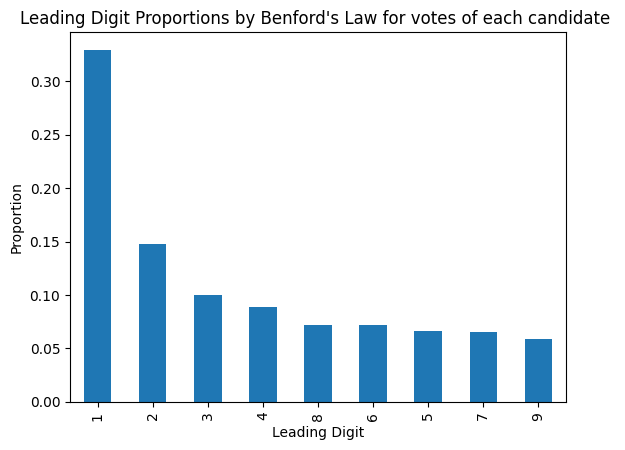

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value counts of leading digits
leading_digit_counts = X["leading_digit_votes"].value_counts()

# Calculate the proportion of each leading digit and plot the bar chart
(leading_digit_counts / leading_digit_counts.sum()).plot(kind='bar')

plt.xlabel("Leading Digit")
plt.ylabel("Proportion")
plt.title("Leading Digit Proportions by Benford's Law for votes of each candidate ")
plt.show()


 Benford's Law can raise a flag for further investigation, it's crucial to remember that drawing conclusions solely based on this law can be misleading.

In [ ]:
y=data["Position"]

In [ ]:
y.value_counts()


False    3764
True      234
Name: Position, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Sex']=le.fit_transform(X['Sex'].astype('str'))
X['Party']=le.fit_transform(X['Party'].astype('str'))
X['Constituency_Name']=le.fit_transform(X['Constituency_Name'].astype('str'))
X['Constituency_Type']=le.fit_transform(X['Constituency_Type'].astype('str'))
X['Sub_Region']=le.fit_transform(X['Sub_Region'].astype('str'))
# X['Deposit_Lost']=le.fit_transform(X['Deposit_Lost'].astype('str'))
# X['Last_Party']=le.fit_transform(X['Last_Party'].astype('str'))
X['District_Name']=le.fit_transform(X['District_Name'].astype('str'))
# X['Last_Constituency_Name']=le.fit_transform(X['Last_Constituency_Name'].astype('str'))
X['MyNeta_education']=le.fit_transform(X['MyNeta_education'].astype('str'))
X['TCPD_Prof_Main']=le.fit_transform(X['TCPD_Prof_Main'].astype('str'))
# X['TCPD_Prof_Main_Desc']=le.fit_transform(X['TCPD_Prof_Main_Desc'].astype('str'))
# X['TCPD_Prof_Second']=le.fit_transform(X['TCPD_Prof_Second'].astype('str'))
# X['TCPD_Prof_Second_Desc']=le.fit_transform(X['TCPD_Prof_Second_Desc'].astype('str'))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X.columns


Index(['index', 'Sex', 'Party', 'Votes', 'Valid_Votes', 'Electors',
       'Constituency_Name', 'Constituency_Type', 'Sub_Region', 'Contested',
       'No_Terms', 'Turncoat', 'Incumbent', 'Recontest', 'Age',
       'District_Name', 'MyNeta_education', 'TCPD_Prof_Main'],
      dtype='object')

In [ ]:
X= X.reset_index()

In [ ]:
X_train= X_train.replace([np.inf, -np.inf,np.nan], 0)
X_test = X_test.replace([np.inf, -np.inf,np.nan], 0)
X = X.replace([np.inf, -np.inf,np.nan], 0)

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm.shape)

(2, 2)


In [ ]:
with np.printoptions(threshold=np.inf):
    print(cm)

[[756   5]
 [  2  37]]


In [ ]:
cm

array([[756,   5],
       [  2,  37]])

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 98.78 %
Standard Deviation: 0.41 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9135802469135802

In [ ]:
print(classifier.coef_)

[[ 5.84016178e-04 -8.41208903e-06  1.70159864e-02  3.29162108e-04
  -2.05156963e-04  4.45488943e-05 -3.61167386e-03  1.28269082e-05
   4.01294393e-04 -6.88824734e-04  1.91710118e-03 -2.48538827e-05
  -5.38873934e-04 -5.69424239e-04 -9.48590301e-03  2.59944254e-03
   7.48152157e-04 -1.65732746e-03]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.predict(X_test)
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.65 %
Standard Deviation: 0.83 %


In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8292682926829267

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm.shape)

(2, 2)


In [ ]:
cm

array([[752,   9],
       [  5,  34]])

In [ ]:
data.corr()

,Unnamed: 0,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Votes,Candidate_Type,...,last_poll,Contested,Last_Party_ID,No_Terms,Incumbent,Recontest,Age,PC_Name,PC_No,CandID
Unnamed: 0,1.000000,NaN,0.999448,NaN,NaN,NaN,NaN,0.006985,-0.001396,NaN,...,NaN,0.000715,-0.070502,0.003598,0.011154,-0.007820,0.014045,NaN,NaN,NaN
Assembly_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Constituency_No,0.999448,NaN,1.000000,NaN,NaN,NaN,NaN,0.008674,0.001310,NaN,...,NaN,0.001167,-0.073471,0.004621,0.012175,-0.006896,0.014947,NaN,NaN,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poll_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DelimID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,0.006985,NaN,0.008674,NaN,NaN,NaN,NaN,1.000000,0.753262,NaN,...,NaN,0.373711,-0.036453,0.703183,0.367988,0.269530,0.252424,NaN,NaN,NaN
Votes,-0.001396,NaN,0.001310,NaN,NaN,NaN,NaN,0.753262,1.000000,NaN,...,NaN,0.431680,-0.255574,0.655308,0.470890,0.363067,0.334749,NaN,NaN,NaN
Candidate_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


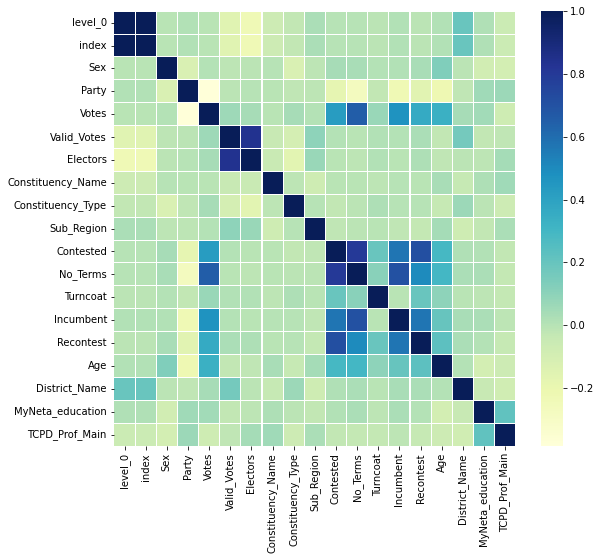

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = X.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
